<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/MCSO/notebooks/08_ClasificadorImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN como clasificador del dataset MNIST

In [ ]:
# importarmos las librerías necesarias

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D




#### The MNIST dataset

Usamos [MNIST dataset](http://yann.lecun.com/exdb/mnist/). 

It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models. 

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Your goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

#### Load and preprocess the data

In [ ]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:

def scale_mnist_data(train_images, test_images):

    return (train_images/255., test_images/255.)
    
    

In [ ]:

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [ ]:

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

#### Build the convolutional neural network model

We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In particular, your neural network should have six layers.

In [ ]:

def get_model(input_shape):

    model = Sequential([
        Conv2D(8, (3,3), padding='same', strides=1, activation='relu', input_shape=(28, 28, 1), data_format='channels_last'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    return model
     
    

In [ ]:

model = get_model(scaled_train_images[0].shape)

#### Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [ ]:

def compile_model(model):
    
    model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
    

In [ ]:
# Run your function to compile the model

compile_model(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                100416    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 105,306
Trainable params: 105,306
Non-trainable params: 0
__________________________________________________

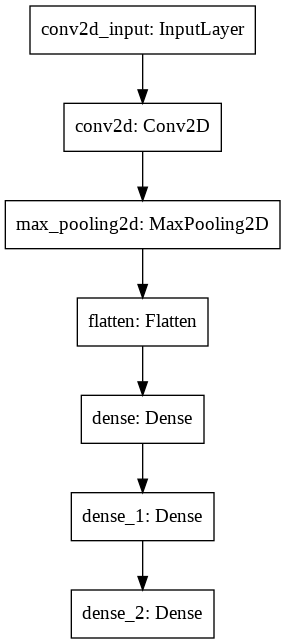

In [ ]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=False) 

#### Fit the model to the training data

Now you should train the model on the MNIST dataset, using the model's `fit` method. Set the training to run for 5 epochs, and return the training history to be used for plotting the learning curves.

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
def train_model(model, train_data, train_targets, epochs):
    
    history = model.fit(train_data, train_targets, epochs = epochs, validation_split=0.10, batch_size=64)
    
    return history

Este tarda un rato en entrenar, yo ya lo tengo hecho

In [ ]:
# Run your function to train the model
epochs=60
history = train_model(model, scaled_train_images, train_labels, epochs)

Epoch 1/60
844/844 [==============================] - 19s 21ms/step - loss: 0.5702 - accuracy: 0.8309 - val_loss: 0.1084 - val_accuracy: 0.9708
Epoch 2/60
844/844 [==============================] - 17s 20ms/step - loss: 0.1067 - accuracy: 0.9686 - val_loss: 0.0771 - val_accuracy: 0.9755
Epoch 3/60
844/844 [==============================] - 17s 20ms/step - loss: 0.0651 - accuracy: 0.9799 - val_loss: 0.0587 - val_accuracy: 0.9823
Epoch 4/60
844/844 [==============================] - 17s 20ms/step - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.0627 - val_accuracy: 0.9818
Epoch 5/60
844/844 [==============================] - 17s 20ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0569 - val_accuracy: 0.9855
Epoch 6/60
844/844 [==============================] - 17s 20ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0598 - val_accuracy: 0.9833
Epoch 7/60
844/844 [==============================] - 17s 20ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0617 - val_accuracy:

#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [ ]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

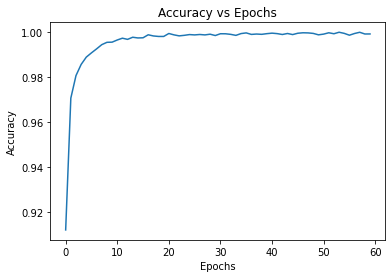

In [ ]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

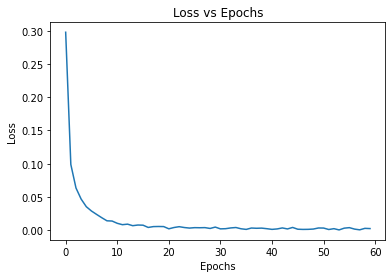

In [ ]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [ ]:

def evaluate_model(model, scaled_test_images, test_labels):
    
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels)
    
    return (test_loss, test_accuracy)    
    

In [ ]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 2s 6ms/step - loss: 0.1148 - accuracy: 0.9861
Test loss: 0.11477674543857574
Test accuracy: 0.9861000180244446


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

Prueba de forma aleatoria

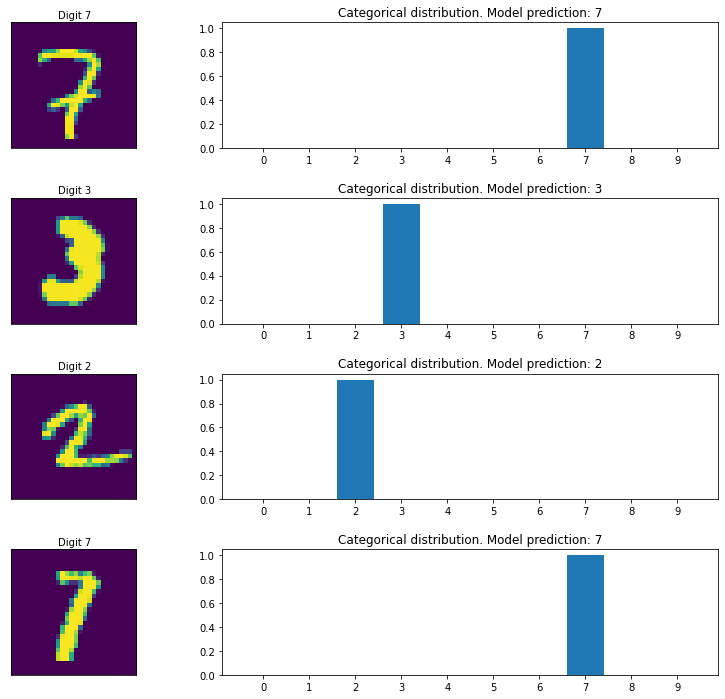

In [ ]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

A continuación se verá validation and regularisation in our model training, and introduce Keras callbacks.